### Imports

In [31]:
import math, random
import numpy as np
import matplotlib.pyplot as plt
import sys
import statistics
from IPython.display import Markdown, clear_output
import ipywidgets as widgets
%matplotlib inline
%matplotlib widget
plt.rcParams['font.size'] = 14

### EOQ Setup 
The key parameters for the analysis are :

| Symbol | Parameter |
|--------|-----------|
| $D$    | Annual Demand    |
| $S$    | Ordering Cost |
| $H$    | Holding Cost  |
| $Q$    | Optimal Order Quantity |
|$L$     | Lead Time |
|$sL$| Safety Stock Level |
| $d$    | Mean Demand |
| $\sigma$ | Standard Deviation |
| $T$     | Total number of orders |
| $RP$    | Reordering points |
| $N$     | Number of cycles   |
|$AOC$    | Annual Ordering Cost|
|$AHC$    | Annual Holding Cost |
|$ATC$    | Annual Total Cost |


In [10]:
# EOQ Formula
D = 10000
S = 10
H = 0.3 + random.uniform(0,1)
Q = math.sqrt((2*D*S)/H)

# Mean demand rate and standard deviation
d = 100
sigma = 40

# Cost analysis
T = math.ceil(D/Q)
RP = math.ceil(Q/d)
numberOfCycles = int(T*RP)
AOC = (T*S)
AHC = ((Q/2)*H)
ATC = AOC + AHC

# Starting values
L = 2
currentInventory =  500.0
previousInventory =  501.0
Ls = []
sL = Q//4

# Trackers and plotters
tracker = 99999999
currentIteration = 0
inventoryLevel = []
reorderPoints = []
reorderPoint = 0
belowZero = []
isOrder = False
isZero = False
rpX = []
rpY = []
bzX = []
bzY = []

# Statements
display(Markdown(f"Chosen annual demand **(D)** : **{D}**, chosen mean demand **(d)** rate : **{d}**"))
display(Markdown(f"Optimal Order Quantity **(Q)** : **{Q:.2f}**, total number of orders required **(T)** : **{T}**, **(D/Q)**"))
display(Markdown(f"The length of a replenishment cycle **(RP)** is : **{RP}**, **(Q/d)**"))
display(Markdown(f"Number of cycles required to fulfill the annual demand is : **{numberOfCycles}**, **(T x RP)**"))
display(Markdown(f"Fixed Ordering Cost **S** : **{S}**, Varible Holding Cost **H** : **{H:.2f}**, lead time **L** : **{L}**"))
display(Markdown(f"Annual Ordering Cost **(AOC)** : **{AOC:.2f}**"))
display(Markdown(f"Annual Holding Cost **(AHC)** : **{AHC:.2f}**"))
display(Markdown(f"Annual Total Cost **(ATC)** : **{ATC:.2f}**"))



Chosen annual demand **(D)** : **10000**, chosen mean demand **(d)** rate : **100**

Optimal Order Quantity **(Q)** : **423.60**, total number of orders required **(T)** : **24**, **(D/Q)**

The length of a replenishment cycle **(RP)** is : **5**, **(Q/d)**

Number of cycles required to fulfill the annual demand is : **120**, **(T x RP)**

Fixed Ordering Cost **S** : **10**, Varible Holding Cost **H** : **1.11**, lead time **L** : **2**

Annual Ordering Cost **(AOC)** : **240.00**

Annual Holding Cost **(AHC)** : **236.07**

Annual Total Cost **(ATC)** : **476.07**

### Simulation 

In [ ]:
for cycle in range(numberOfCycles):

    currentIteration = 0
    isOrder = False
    isZero = False
    previousInventory = currentInventory + 1
    
    while (currentInventory < previousInventory):
        
        
        rDList = d + sigma * np.random.randn(29)
        randomDemand = rDList.mean()
        
        inventoryLevel.append(currentInventory)
        previousInventory = currentInventory
        
        mc_runs = (np.array(currentInventory)-rDList)
        currentInventory -= randomDemand.item()
        
        
        Ls.append(mc_runs)

        if currentInventory < 0 and not isZero:
            bzX.append(len(inventoryLevel) - 1)
            bzY.append(previousInventory)
            isZero = True
            
        if (currentInventory - (L * d) <= sL) and not isOrder:
            tracker = currentIteration
            reorderPoint = tracker
            rpX.append(len(inventoryLevel))
            rpY.append(currentInventory)
            isOrder = True

        if (currentIteration == tracker + L):
            currentInventory += Q
            isOrder = False
            
        currentIteration += 1

### Plotting vanilla EOQ

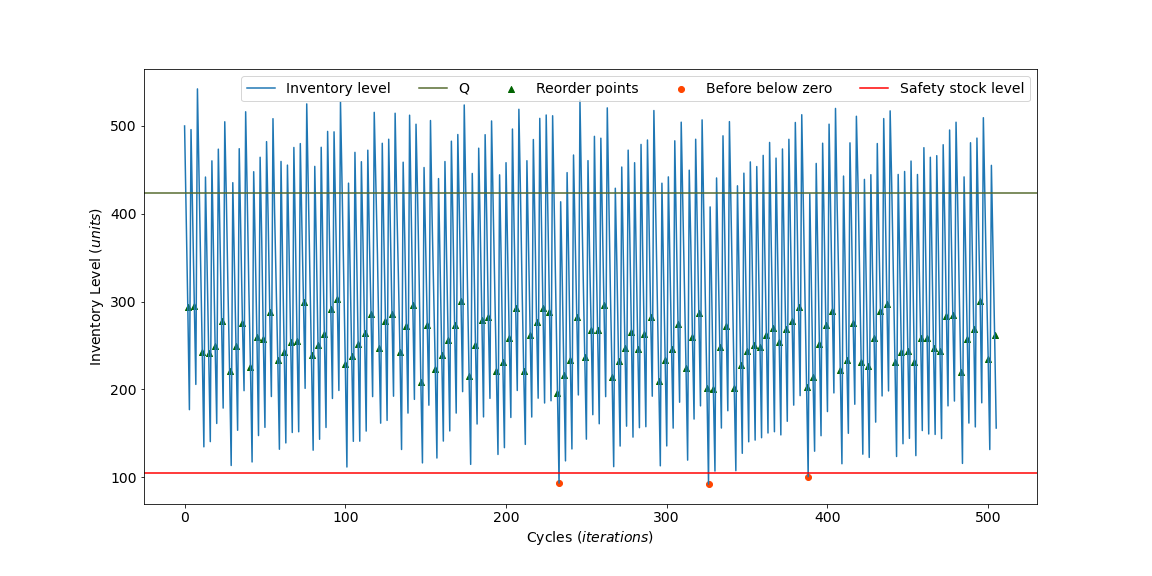

In [11]:
plt.close('all')
num = "EOQ trial"
fig,ax = plt.subplots(num=num, figsize = (16,8))
ax.plot(inventoryLevel, label ="Inventory level")
ax.set(xlabel = "Cycles $(iterations)$", ylabel = "Inventory Level $(units)$")
ax.axhline(Q,color="darkolivegreen", label = "Q")
ax.scatter(rpX,rpY, marker = "^", color = "darkgreen", label = "Reorder points")
# ax.axhline(statistics.mean(inventoryLevel),color = "royalblue", label = "Average inventory level")
ax.scatter(bzX, bzY, marker = "o", color = "orangered", label = "Before below zero")
ax.axhline(sL, color = "red", label = "Safety stock level")
ax.legend(ncol=5);

### Plotting parallel MC on EOQ

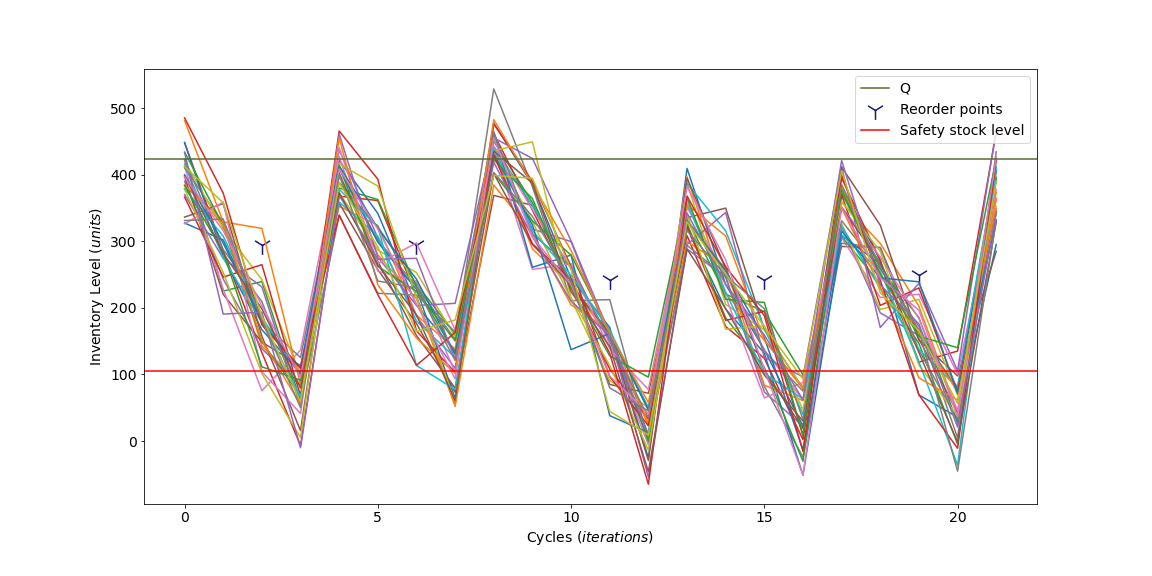

In [30]:
plt.close('all')
num = "MC Runs for Inventory Decay on EOQ"
figX,axX = plt.subplots(num=num, figsize = (16,8))
axX.plot(Ls[:22])
axX.axhline(Q,color="darkolivegreen", label = "Q")
axX.scatter(rpX[:5],rpY[:5], marker = "1", color = "midnightblue", s = 350, label = "Reorder points")
axX.axhline(sL, color = "red", label = "Safety stock level")
axX.set(xlabel = "Cycles $(iterations)$", ylabel = "Inventory Level $(units)$")
axX.legend();

In [32]:
# TODO Sequential MC on EOQ (think Random Walk - adding 2 RVs - adds their variances - giving more uncertainty)